In [1]:
import glob

In [2]:
for file in glob.glob('dataset/0.0/*.png'):
    print(file)

dataset/0.0/GATTAMORTA_NATALINA-T1-12.png
dataset/0.0/BEVILACQUA_RITA-T1-98.png
dataset/0.0/BEVILACQUA_RITA-T1-101.png
dataset/0.0/CRESCENZI_ARMANDO-T1-82.png
dataset/0.0/FERRAZZA_RITA-T1-62.png
dataset/0.0/ISONI_FRANCESCO-T1-97.png
dataset/0.0/FILIPPONI_QUINTINO-T1-83.png
dataset/0.0/D_ANGELI_ANNUNZIATA-T1-81.png
dataset/0.0/BERNOLA_TERESA-T1-53.png
dataset/0.0/D_ANGELI_ANNUNZIATA-T1-96.png
dataset/0.0/GEGGI_GIULIO-T1-40.png
dataset/0.0/BEVILACQUA_RITA-T1-99.png
dataset/0.0/COLAFRANCESCO_ROCCO-T1-77.png
dataset/0.0/FILIPPONI_QUINTINO-T1-92.png
dataset/0.0/BIANCHI_ORAZIO-T1-90.png
dataset/0.0/DI_MASSA_SERGIO-T1-68.png
dataset/0.0/GEGGI_GIULIO-T1-34.png
dataset/0.0/DOBRISAN_DORINA-T1-96.png
dataset/0.0/BERTUZZI_LUISA-T1-89.png
dataset/0.0/D_ANGELI_ANNUNZIATA-T1-89.png
dataset/0.0/LO_BELLO_MARIO-T1-64.png
dataset/0.0/INCITI_DONATA-T1-88.png
dataset/0.0/GIANFELICI_LUISA-T1-40.png
dataset/0.0/CRESCENZI_ARMANDO-T1-88.png
dataset/0.0/DOBRISAN_DORINA-T1-94.png
dataset/0.0/CAMACCI_FILIBERTO-T1

In [3]:
import tensorflow as tf

In [4]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [5]:
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [7]:
import pathlib
data_dir = pathlib.Path("dataset")

In [8]:
image_count = len(list(data_dir.glob('*/*.png')))
image_count

2260

In [10]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES

array(['0.0', '1.0'], dtype='<U3')

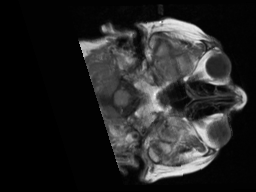

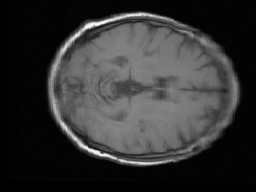

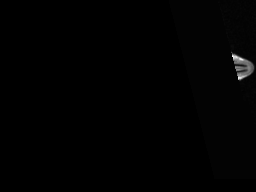

In [11]:
zeros = list(data_dir.glob('0.0/*'))

for image_path in zeros[:3]:
    display.display(Image.open(str(image_path)))

In [12]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [13]:
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

In [14]:
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

Found 2260 images belonging to 2 classes.


In [15]:
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(image_batch[n])
        plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
        plt.axis('off')

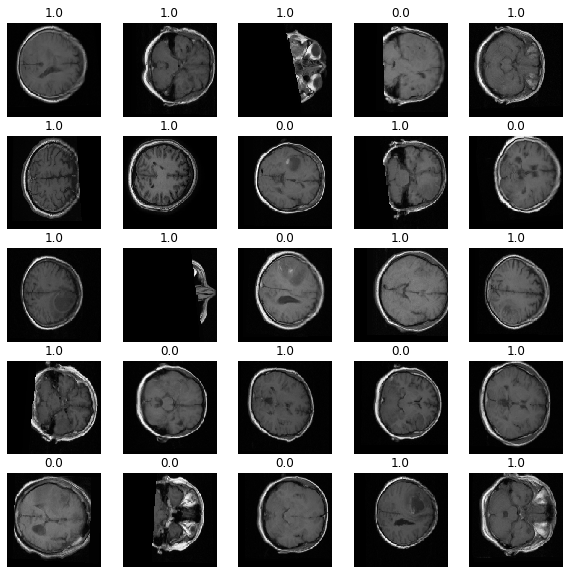

In [16]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

In [17]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'))

In [19]:
def get_label(file_path):
    # convert the path to a list of path components
    parts = tf.strings.split(file_path, os.path.sep)
    # The second to last is the class-directory
    return parts[-2] == CLASS_NAMES

In [20]:
def decode_img(img):
    # convert the compressed string to a 3D uint8 tensor
    img = tf.image.decode_jpeg(img, channels=3)
    # Use `convert_image_dtype` to convert to floats in the [0,1] range.
    img = tf.image.convert_image_dtype(img, tf.float32)
    # resize the image to the desired size.
    return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])

In [24]:
def process_path(file_path):
    label = get_label(file_path)
    # load the raw data from the file as a string
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    return img, label

In [25]:
process_path

<function __main__.process_path(file_path)>

In [26]:
list_ds

<DatasetV1Adapter shapes: (), types: tf.string>

In [27]:
AUTOTUNE

-1

In [28]:
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
labeled_ds = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

AttributeError: in converted code:

    <ipython-input-21-fee9233497b3>:2 process_path  *
        label = get_label(file_path)
    <ipython-input-19-aa021285de8b>:3 get_label  *
        parts = tf.strings.split(file_path, os.path.sep)
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/ops/ragged/ragged_string_ops.py:642 strings_split_v1
        return ragged_result.to_sparse()

    AttributeError: 'Tensor' object has no attribute 'to_sparse'


In [23]:
for image, label in labeled_ds.take(1):
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())

NameError: name 'labeled_ds' is not defined